# Overview

The K-Nearest Neighbors or KNN Classification is a simple and easy to implement, supervised machine learning algorithm that is used mostly for classification problems.

Suppose there are two classes represented by Rectangles and Triangles. If we want to add a new shape (Diamond) to any one of the classes, then we can implement the KNN Classification model.


## Use Case 

To apply the KNN Classification model in practical use, I  will use the DMV Test dataset which has three columns. The first two columns consist of the two DMV written tests (DMV_Test_1 and DMV_Test_2) which are the independent variables and the last column consists of the dependent variable, Results which denote that the driver has got the license (1) or not (0).

In this, we have to build a KNN Classification model using this data to predict if a driver who has taken the two DMV written tests will get the license or not using those marks obtained in their written tests and classify the results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Let's get the dataset

In [2]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Classification/master/DMVWrittenTests.csv')
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values
dataset.head(5)

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Let's split the data into training and test sets.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Feature Scaling

This is an additional step that is used to normalize the data within a particular range. It also aids in speeding up the calculations. As the data is widely varying, we use this function to limit the range of the data within a small limit ( -2,2). For example, the score 62.0730638 is normalized to -0.21231162 and the score 96.51142588 is normalized to 1.55187648. In this way, the scores of X_train and X_test are normalized to a smaller range.

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

and here is our model KNN Classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Predicting the test results

In [6]:
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0])

In [7]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))
cm

Accuracy :  0.8


array([[11,  2],
       [ 4, 13]])

![ConfusionMatrix](ConfusionMatrix.png "ConfusionMatrix")

<AxesSubplot:>

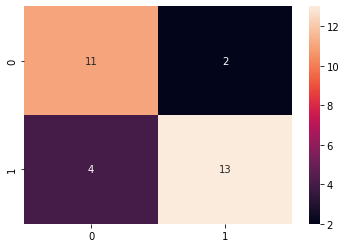

In [8]:
import seaborn as sns
sns.heatmap(cm, annot=True)

Comparing the Real Values with Predicted Values


In [9]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df


,Real Values,Predicted Values
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,0
7,0,0
8,1,1
9,0,0


Visualising Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


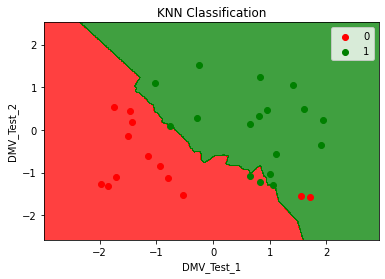

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN Classification')
plt.xlabel('DMV_Test_1')
plt.ylabel('DMV_Test_2')
plt.legend()
plt.show()